<a href="https://colab.research.google.com/github/Nburkhal/DS-Unit-2-Kaggle-Challenge/blob/master/assignment_kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 1

## Assignment
- [x] Do train/validate/test split with the Tanzania Waterpumps data.
- [x] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what other columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [x] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [x] Get your validation accuracy score.
- [x] Get and plot your feature importances.
- [x] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [x] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [x] Add your own stretch goal(s) !
- [x] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Try other [scikit-learn scalers](https://scikit-learn.org/stable/modules/preprocessing.html).
- [x] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```



In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

     |████████████████████████████████| 92kB 3.1MB/s 
     |████████████████████████████████| 133kB 8.8MB/s 
     |████████████████████████████████| 7.1MB 37.1MB/s 
     |████████████████████████████████| 614kB 41.3MB/s 
     |████████████████████████████████| 225kB 38.5MB/s 
     |████████████████████████████████| 768kB 37.6MB/s 
     |████████████████████████████████| 194kB 44.1MB/s 
     |████████████████████████████████| 51kB 20.1MB/s 
     |████████████████████████████████| 51kB 19.1MB/s 
     |████████████████████████████████| 737kB 40.1MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145036 sha256=396f64cb6f988a5e40ca512091967ae79008ae9745800ae74744e3a2a6483dc0
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=4786c7ac03da050a4648b0890820ef7a5dd829a23ae2a1522eda033f31739253
  Stored 

In [2]:
# Update sklearn 
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.21.3)


In [3]:
# Import necessary modules
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import make_pipeline
import category_encoders as ce
import itertools
from math import floor

%matplotlib inline
plt.style.use('fivethirtyeight')

train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [4]:
import sklearn; sklearn.__version__

'0.21.3'

In [5]:
# Train/Validate/Test split the data
train, val = train_test_split(
    train, train_size=0.80, test_size=0.20,
    stratify=train['status_group'], random_state=4
)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [6]:
# What's our data look like?
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
57685,51201,5000.0,2011-02-26,Wsdp,112,Wachina,38.865788,-6.829784,Mshindo Shabani Bom,102,Wami / Ruvu,Bomu,Pwani,6,2,Kibaha,Soga,20,True,GeoData Consultants Ltd,Parastatal,upper Ruvu,True,2010,mono,mono,motorpump,private operator,commercial,pay monthly,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
19536,71066,500.0,2011-10-04,Unicef,1525,DWE,34.664787,-8.984294,Shuleni,0,Rufiji,Mmana,Iringa,11,4,Njombe,Usuka,350,True,GeoData Consultants Ltd,WUA,wanging'ombe water supply s,True,1984,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
17706,20440,0.0,2013-01-18,Government Of Tanzania,243,DWE,38.560631,-9.780829,Barabara Ya Rwangwa,0,Ruvuma / Southern Coast,Luhuma,Lindi,80,43,Liwale,Mirui,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,2000,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,salty,salty,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
38260,6595,0.0,2012-10-05,Netherlands,0,DWE,34.062483,-3.232824,Upendo,0,Internal,Jilago,Shinyanga,17,2,Maswa,Mpindo,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,other,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
43503,62370,0.0,2012-10-17,Rwssp,0,RWSSP,33.204758,-3.866347,Kwa Kangayu,0,Internal,Shabayanda,Shinyanga,17,3,Shinyanga Rural,Tinde,0,True,GeoData Consultants Ltd,WUG,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [7]:
# Check out descriptive statistics of our data
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,47520.000000,47520.000000,47520.000000,47520.000000,4.752000e+04,47520.000000,47520.000000,47520.000000,47520.000000,47520.000000
mean,37072.550105,318.726870,668.960059,34.082743,-5.704429e+00,0.457260,15.236848,5.591604,180.455535,1300.276031
std,21451.469190,3093.597421,692.617823,6.536411,2.941646e+00,11.270408,17.491400,9.558138,471.411984,951.778810
min,1.000000,0.000000,-90.000000,0.000000,-1.164838e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18484.750000,0.000000,0.000000,33.087349,-8.533191e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,36953.500000,0.000000,371.000000,34.906189,-5.022271e+00,0.000000,12.000000,3.000000,30.000000,1986.000000
75%,55606.500000,25.000000,1319.000000,37.166992,-3.329228e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [8]:
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,47520,1,GeoData Consultants Ltd,47520
public_meeting,44857,2,True,40852
permit,45077,2,True,31039
status_group,47520,3,functional,25807
source_class,47520,3,groundwater,36659
quantity_group,47520,5,enough,26566
quantity,47520,5,enough,26566
management_group,47520,5,user-group,42012
quality_group,47520,6,good,40640
waterpoint_type_group,47520,6,communal standpipe,27705


In [9]:
# And put it on a map
px.set_mapbox_access_token('pk.eyJ1IjoibmJ1cmtoYWwiLCJhIjoiY2p6MGhxN2o5MGMybjNnbXI1b2NsaGxlbCJ9.tMEfPH8DxPNtr_rAHzMqFQ')
fig = px.scatter_mapbox(train, lat='latitude', lon='longitude', 
                        color='status_group', zoom=3)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

In [10]:
# Define a function to wrangle our train/val/test sets in the same way
def wrangle(X):
  
  X = X.copy()
  
  # Replace near-zero latitude value with 0
  X['latitude'] = X['latitude'].replace(-2e-08, 0)
  
  # Define all columns with arbitrary zeros and replace w/ NaN
  # Keep an eye on amount_tsh
  cols_with_zeros = ['longitude', 'latitude', 'population', 
                    'construction_year']
  for col in cols_with_zeros:
    X[col] = X[col].replace(0, np.nan)
    
  # Drop columns that are similar/duplicates
  # Drop num_private - not really telling us anything and there is no description for it
  X = X.drop(columns=['quantity_group', 'id', 'recorded_by', 'scheme_name', 
                     'extraction_type_group', 'extraction_type_class', 
                     'scheme_management', 'waterpoint_type_group', 
                     'quality_group', 'source_class', 'source_type', 
                     'num_private', 'installer', 'payment_type'])
  
  # Group high cardinality features
  # Keep an eye on these and the effect changing this has on our model
  lga_top20 = X['lga'].value_counts()[:20].index
  funder_top20 = X['funder'].value_counts()[:20].index
  ward_top50 = X['ward'].value_counts()[:50].index
  subvillage_top50 = X['subvillage'].value_counts()[:50].index
  wpt_top50 = X['wpt_name'].value_counts()[:50].index

  # At locations where the value is NOT in the top 10,
  # replace the value with 'OTHER'
  X.loc[~X['lga'].isin(lga_top20), 'lga'] = 'OTHER'
  X.loc[~X['funder'].isin(funder_top20), 'funder'] = 'OTHER'
  X.loc[~X['ward'].isin(ward_top50), 'ward'] = 'OTHER'
  X.loc[~X['subvillage'].isin(subvillage_top50), 'subvillage'] = 'OTHER'
  X.loc[~X['wpt_name'].isin(wpt_top50), 'wpt_name'] = 'OTHER'
  
  # Convert date_recorded to datetime
  X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
  
  # Create new last_inspected column
  # Takes year of date recorded - construction date
  X['last_inspected'] = X['date_recorded'].dt.year - X['construction_year']
  
  # Return the wrangled dataframe
  return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)
train.shape, val.shape, test.shape

((47520, 28), (11880, 28), (14358, 27))

In [11]:
fig = px.scatter_mapbox(train, lat='latitude', lon='longitude', color='status_group', opacity=0.1)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

In [12]:
train.describe()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,last_inspected
count,47520.000000,47520.000000,46086.000000,46086.000000,47520.000000,47520.000000,30409.000000,30943.000000,30943.000000
mean,318.726870,668.960059,35.143252,-5.881927,15.236848,5.591604,281.997007,1996.868985,15.305497
std,3093.597421,692.617823,2.604523,2.806864,17.491400,9.558138,564.486836,12.437141,12.456846
min,0.000000,-90.000000,29.607122,-11.648378,1.000000,0.000000,1.000000,1960.000000,-7.000000
25%,0.000000,0.000000,33.279330,-8.635131,5.000000,2.000000,40.000000,1988.000000,5.000000
50%,0.000000,371.000000,35.004509,-5.171612,12.000000,3.000000,150.000000,2000.000000,13.000000
75%,25.000000,1319.000000,37.216751,-3.375265,17.000000,5.000000,325.000000,2008.000000,25.000000
max,350000.000000,2770.000000,40.345193,-0.998464,99.000000,80.000000,30500.000000,2013.000000,53.000000


In [13]:
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
permit,45077,2,True,31039
public_meeting,44857,2,True,40852
status_group,47520,3,functional,25807
management_group,47520,5,user-group,42012
quantity,47520,5,enough,26566
waterpoint_type,47520,7,communal standpipe,22832
payment,47520,7,never pay,20147
water_quality,47520,8,soft,40640
basin,47520,9,Lake Victoria,8132
source,47520,10,spring,13613


In [13]:
train.head()

,amount_tsh,date_recorded,funder,gps_height,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group,last_inspected
57685,5000.0,2011-02-26,OTHER,112,38.865788,-6.829784,OTHER,Wami / Ruvu,OTHER,Pwani,6,2,OTHER,OTHER,20.0,True,True,2010.0,mono,private operator,commercial,pay monthly,soft,insufficient,river,communal standpipe,functional,1.0
19536,500.0,2011-10-04,Unicef,1525,34.664787,-8.984294,Shuleni,Rufiji,OTHER,Iringa,11,4,Njombe,Usuka,350.0,True,True,1984.0,gravity,wua,user-group,pay monthly,soft,enough,river,communal standpipe,functional,27.0
17706,0.0,2013-01-18,Government Of Tanzania,243,38.560631,-9.780829,OTHER,Ruvuma / Southern Coast,OTHER,Lindi,80,43,OTHER,OTHER,250.0,NaN,True,2000.0,nira/tanira,vwc,user-group,unknown,salty,dry,shallow well,hand pump,non functional,13.0
38260,0.0,2012-10-05,OTHER,0,34.062483,-3.232824,Upendo,Internal,OTHER,Shinyanga,17,2,Maswa,OTHER,NaN,True,False,NaN,nira/tanira,wug,user-group,other,soft,enough,shallow well,hand pump,non functional,NaN
43503,0.0,2012-10-17,Rwssp,0,33.204758,-3.866347,OTHER,Internal,OTHER,Shinyanga,17,3,OTHER,OTHER,NaN,True,True,NaN,nira/tanira,wug,user-group,never pay,soft,seasonal,shallow well,hand pump,functional,NaN


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less



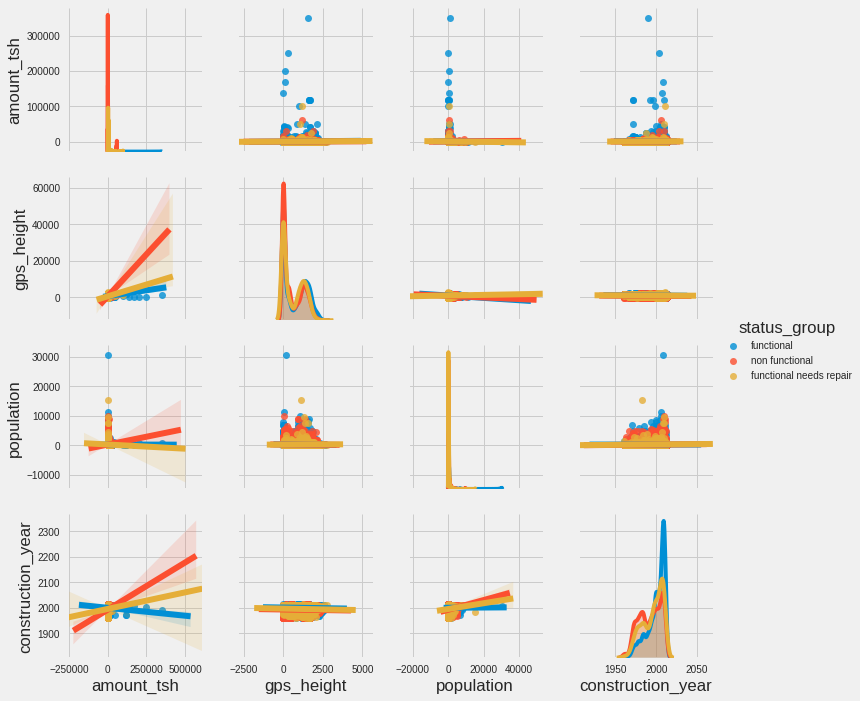

In [14]:
columns = ['amount_tsh', 'gps_height', 'population', 'construction_year']

sns.pairplot(train, vars=columns, hue='status_group', kind='reg');

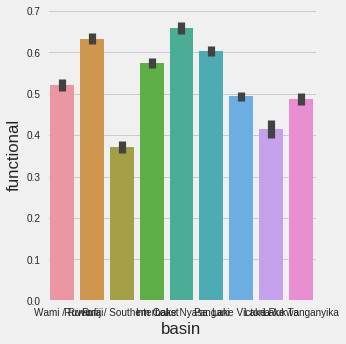

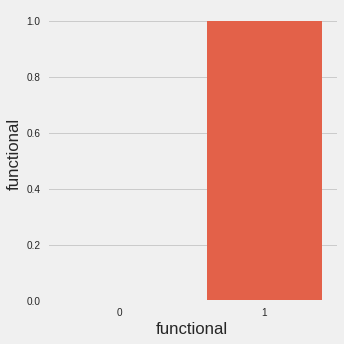

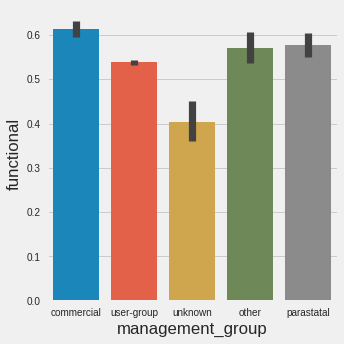

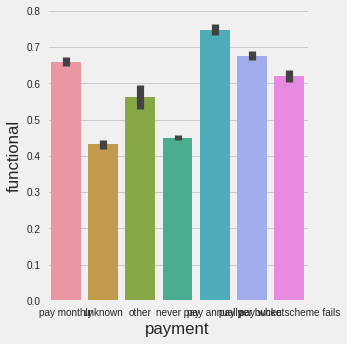

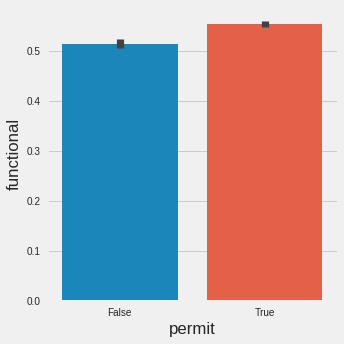

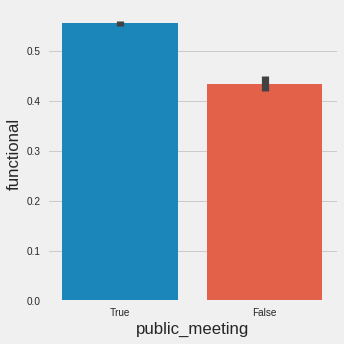

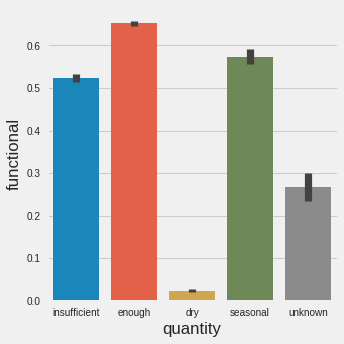

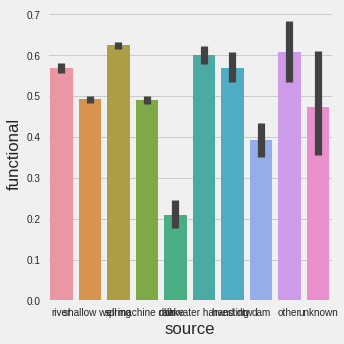

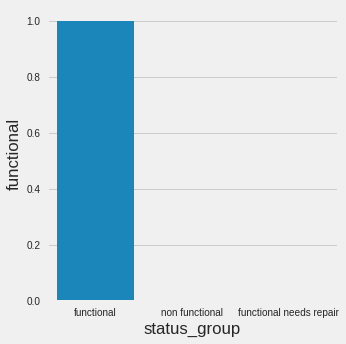

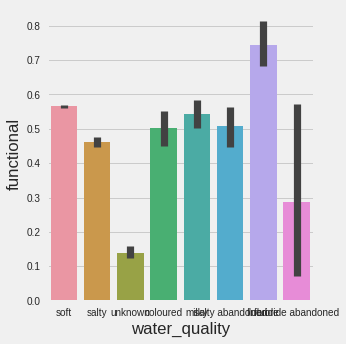

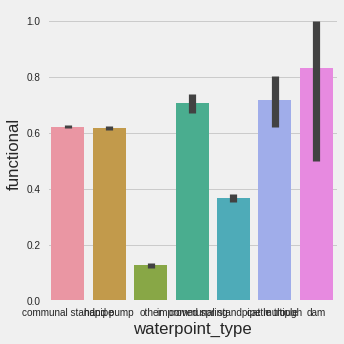

In [16]:
# Further data exploration
# Check the relationships between features and target
train['functional'] = (train['status_group']=='functional').astype(int)

for col in sorted(train.columns):
  if train[col].nunique() < 12:
    sns.catplot(x=col, y='functional', data=train, kind='bar')
    plt.show()

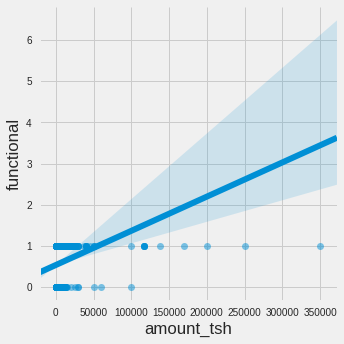

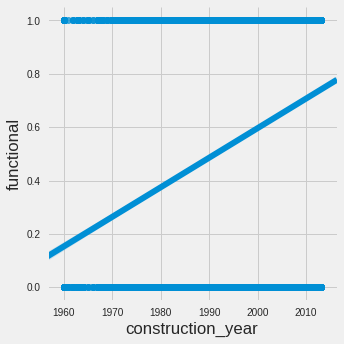

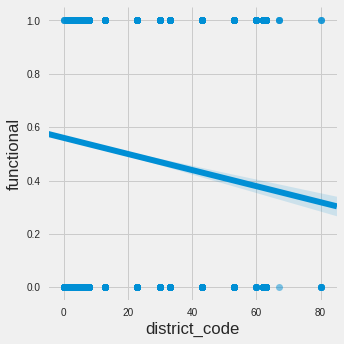

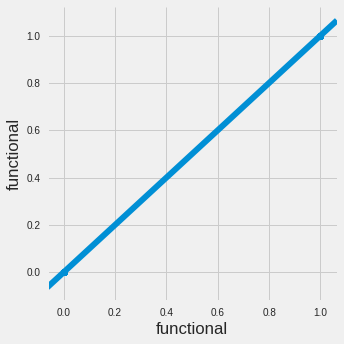

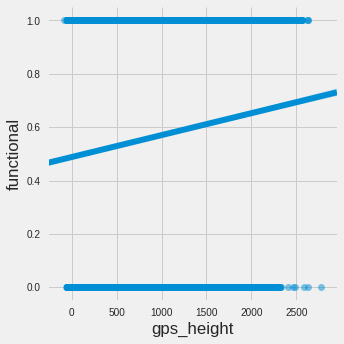

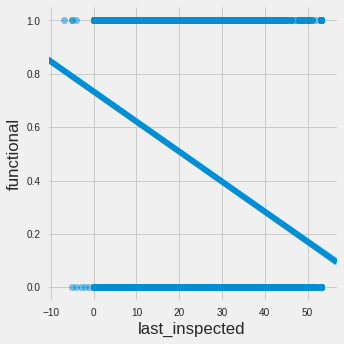

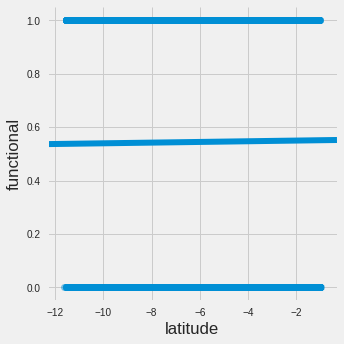

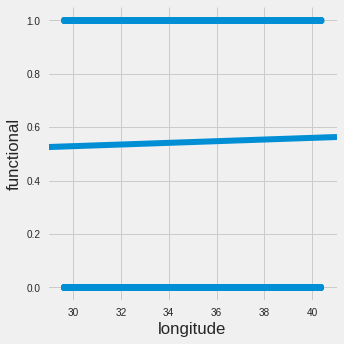

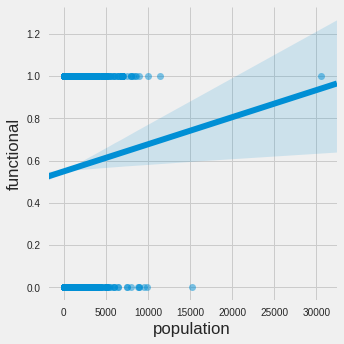

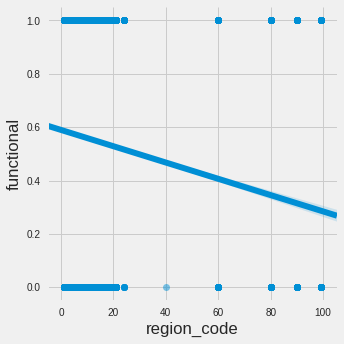

In [17]:
numeric = train.select_dtypes('number')

for col in sorted(numeric.columns):
  sns.lmplot(x=col, y='functional', data=train, scatter_kws=dict(alpha=0.5))
  plt.show()

In [62]:
# Select features

target = 'status_group'
train_features = train.drop(columns=[target, 'functional'])
numeric_features = train_features.select_dtypes(include='number').columns.to_list()
cardinality = train_features.select_dtypes(exclude='number').nunique()
categorical_features = cardinality[cardinality <= 51].index.to_list()

features = numeric_features + categorical_features
print(len(features))

26


In [0]:
# Arrange data into X features matrix and y target vector
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [64]:
# Make pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    IterativeImputer(missing_values=np.nan), 
    StandardScaler(),
    LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on val
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Validation Accuracy: 0.7377104377104378


In [71]:
from sklearn.impute import SimpleImputer

# Decision tree pipeline
dt = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(missing_values=np.nan),
    StandardScaler(), 
    DecisionTreeClassifier(min_samples_leaf=34, random_state=42)
)

# Fit on train
dt.fit(X_train, y_train)

# Score on val
print('Train Accuracy', dt.score(X_train, y_train))
print('Validation Accuracy:', dt.score(X_val, y_val))

Train Accuracy 0.7917718855218855
Validation Accuracy: 0.7654882154882154


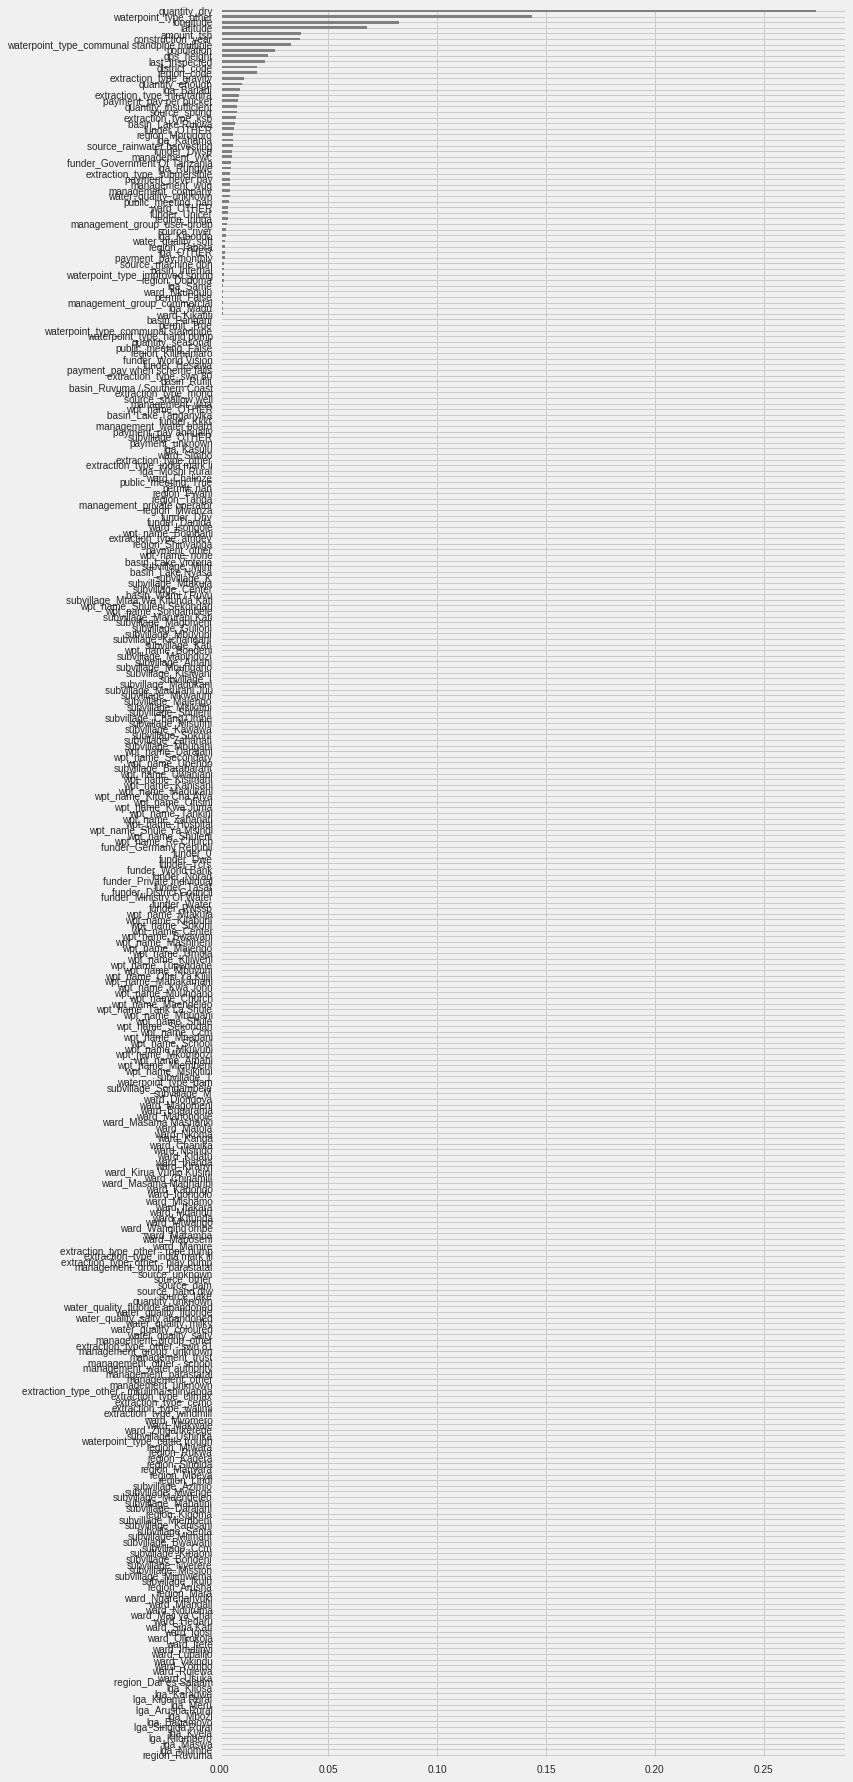

In [87]:
# Plot feature importances
model = dt.named_steps['decisiontreeclassifier']
encoder = dt.named_steps['onehotencoder']
encoded_columns = encoder.fit_transform(X_train).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh(color='grey');

In [82]:
# Let's give a random forest a shot
from sklearn.ensemble import RandomForestClassifier

rf = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(missing_values=np.nan),
    StandardScaler(), 
    RandomForestClassifier(n_estimators=200, min_samples_leaf=4, n_jobs=-1, 
                           random_state=42, max_features=0.5)
)

# Fit on train
rf.fit(X_train, y_train)

# Score on val
print('Train Accuracy:', rf.score(X_train, y_train))
print('Validation Accuracy:', rf.score(X_val, y_val))

Train Accuracy: 0.8992845117845117
Validation Accuracy: 0.8028619528619528


In [0]:
assert all(X_train.columns == X_test.columns)

In [0]:
# Predict on test
y_pred = rf.predict(X_test)


# Write submission csv file
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('Burkhalter_DS6_Unit2_submission2.csv', index=False)

In [91]:
!head Burkhalter_DS6_Unit2_submission2.csv

id,status_group
50785,functional
51630,functional
17168,functional
45559,non functional
49871,functional
52449,functional
24806,functional
28965,non functional
36301,non functional


In [0]:
if in_colab:
    from google.colab import files
    # Just try again if you get this error:
    # TypeError: Failed to fetch
    # https://github.com/googlecolab/colabtools/issues/337
    files.download('Burkhalter_DS6_Unit2_submission2.csv')